<div style="text-align: left">
    <img src="../../_static/xcdat-logo.png" alt="xCDAT logo" style="width:500px;"/>
</div>

<div style="text-align: left">
    <img src="images/scipy-logo.png" alt="SciPy logo" style="width:150px;">
</div>

# SciPy 2024 - xCDAT (Xarray Climate Data Analysis Tools)

<div style="text-align: left; font-style: italic">
    <h3>"A Python Package for Simple and Robust Analysis of Climate Data"</h3>
</div>

<div style="text-align: left;">
    <h2>Presented by Tom Vo</h2>
</div>

---

<p style="text-align: left; font-size: 12px">This work is performed under the auspices of the U. S. DOE by Lawrence Livermore National Laboratory under contract No. DE-AC52-07NA27344.</p>


## Notebook Setup

Create an Anaconda environment for this notebook using the command below:

```bash
conda create -n xcdat_scipy_2024 -c conda-forge xcdat=0.7.0 nco matplotlib ipython ipykernel cartopy nc-time-axis gsw-xarray jupyter jupyter_contrib_nbextensions rise wget

conda activate xcdat_scipy_2024
```

Then run:

```bash
jupyter contrib nbextension install --user

jupyter nbextension enable splitcell/splitcell
```

To open Jupyter Notebook GUI:

```bash
jupyter notebook
```

To print notebook as PDF:

```bash
jupyter nbconvert docs/demos/24-07-11-scipy-2024/scipy-2024.ipynb --to html
# Then "Print HTML to PDF" in your browser
```


### This presentation is available on xCDAT's Read The Docs Page

<div style="text-align: center; margin-top:10px">
    <img src="images/pres-qr-code.png" alt="Presentation QR Code" align=\"center\" style="display: inline-block; margin-right:10px; width:300px;">
</div>

#### https://xcdat.readthedocs.io/en/latest/demos/24-07-11-scipy-2024/scipy-2024.html


## Before we start...


### A little about me

- Software Engineer at Lawrence Livermore National Laboratory (**LLNL**)
- Energy Exascale Earth System Model (**E3SM**) and Simplifying ESM Analysis Through Standards (**SEATS**)
- Lead developer of xCDAT
- Contributor and DevOps engineer for various E3SM tools

<div style="text-align: center; margin-top:10px">
    <img src="images/tom.jpg" alt="Tom portrait" align=\"center\" style="display: inline-block; margin-right:10px; width:250px;">
    <img src="images/livermore-logo.png" alt="LLNL logo" align=\"center\" style="display: inline-block; width:250px;">
</div>


#### A big shoutout to the xCDAT core development team including

- Stephen Po-Chedley
- Jason Boutte
- Jill Zhang
- Jiwoo Lee

With thanks to Peter Gleckler, Paul Durack, Karl Taylor, and Chris Golaz.


## An Overview of this Talk

**Objective: Learn about the grounds-up development of an open-source Python package targeted at a specific scientific domain**

- Driving force behind xCDAT
- Scope and mission of xCDAT
- Design philosophy and key features
- Technical demo of an end-to-end analysis workflow
- Parallelism with Dask
- How to get involved


## The Driving Force Behind xCDAT

- Analysis of climate data frequently requires a number of core operations. For example:
  - Reading and writing netCDF files
  - Regridding
  - Spatial and temporal averaging
- Highly performant operations to handle the growing volume of climate data
  - Larger pool of data products
  - Increasing spatiotemporal resolution of model and observational data


### CDAT, the predecessor to xCDAT

<div style="text-align: center; margin-top:10px">
<img src="../../_static/cdat-logo.png" alt="CDAT logo" align=\"center\" style="display: inline-block; width:200px;">
</div>

- CDAT (Community Data Analysis Tools) library provided open-source climate data analysis and visualization packages for over 20 years


### The present-day challenge: **CDAT is end-of-life** as of December 2023

- A big issue for users and packages that depend on CDAT
- A driving need for new analysis software


xCDAT addresses this need by **combining the power of Xarray** with **geospatial analysis features inspired by CDAT**.


### What are the general goals of xCDAT?

- **Offer similar core capabilities to CDAT**
  - e.g., geospatial averaging, temporal averaging, regridding
- **Use modern technologies** in the library’s stack
  - Capable of handling large datasets (e.g., parallelism, lazy operations)
- **Maintainable, extensible, and easy-to-use**
  - Python Enhancement Proposals (PEPs)
  - Reproducible science
- **Foster open-source community**
  - Software sustainability
  - Serve the needs of the climate community in the long-term
  - Community engagement efforts (e.g., Pangeo, ESGF)


<div style="text-align: left; margin-top:10px">
<img src="../../_static/xarray-logo.png" alt="Xarray logo" align=\"center\" style="display: inline-block; width:300px;">
</div>
<h2>"N-D labeled arrays and datasets in Python"</h2>

**Why is Xarray the core technology of xCDAT?**

- Mature widely adopted
- Fiscal funding from NumFocus
- Introduces labels in the form of dimensions, coordinates, and attributes on top of raw NumPy-like arrays
- Intuitive, more concise, and less error-prone user experience

<div style="text-align: center; margin-top:10px">
    <img src="../../_static/NumFocus-logo.png" alt="NumFocus logo" align=\"center\" style="display: inline-block; width:200px;">
</div>


#### Key features of Xarray

- File I/O, indexing and selecting, interpolating, grouping, aggregating, parallelism (Dask), plotting (matplotlib wrapper)
- Supports various file formats netCDF, Iris, OPeNDAP, Zarr, and more
- Interoperability with scientific Python ecosystem such as NumPy, Dask, Pandas, and Matplotlib

<div style="text-align: center;">
  <img src="../../_static/dask-logo.svg" alt="NumFocus logo" align=\"center\" style="display: inline-block; width:250px;">
  <img src="../../_static/matplotlib-logo.svg" alt="NumPy logo" align=\"center\" style="display: inline-block; width:250px;">
  <img src="../../_static/numpy-logo.svg" alt="NumPy logo" align=\"center\" style="display: inline-block; width:250px;">
  <img src="../../_static/pandas-logo.svg" alt="Pandas logo" align=\"center\" style="display: inline-block; width:250px;">

</div>

<div style="text-align: center;">

</div>


<div style="text-align: left; margin-top:10px">
<img src="../../_static/xcdat-logo.png" alt="xCDAT logo" align=\"center\" style="display: inline-block; width:300px;">
<h2>Xarray Climate Data Analysis Tools</h2>
</div>

- Team of climate scientists and software engineers from:

<div style="text-align: center; margin-top:10px">
    <img src="../../_static/e3sm-logo.jpg" alt="E3SM logo" align=\"center\" style="display: inline-block;     margin-right:50px; width:200px;">
    <img src="../../_static/pcmdi-logo.png" alt="PCMDI logo" style="display: inline-block; margin-right:50px; width:200px;">
    <img src="../../_static/seats-logo.png" alt="SEATS logo" style="display: inline-block; width:200px">
</div>

- Focused on routine climate research analysis operations
- Leverages other powerful Xarray-based packages such as xESMF, xgcm, and cf-xarray

<div style="text-align: center; margin-top:10px">
    <img src="../../_static/esmf-logo.png" alt="ESMF logo" style="display: inline-block; margin-right:50px; width:200px;">
    <img src="../../_static/xgcm-logo.png" alt="xgcm logo" align=\"center\" style="display: inline-block; margin-right:50px; width:200px;">
        <img src="../../_static/CF-xarray.png" alt="CF xarray logo" align=\"center\" style="display: inline-block; margin-right:50px; width:200px;">
</div>


<div style="text-align: left; margin-top:10px">
    <h3>xCDAT features for simple, robust, and less error-prone analysis code</h3>
</div>

- Extension of `xr.open_dataset()` and `xr.open_mfdataset()` with post-processing options
- Robust interpretation of Climate and Forecast (CF) Compliant metadata using `cf-xarray`
- Generate missing bounds, center time coords, convert lon axis orientation
- Geospatial weighted averaging
- Temporal averaging, climatologies, departures
- Horizontal regridding (extension of `xesmf` and Python port of `regrid2`)
- Vertical regridding (extension of `xgcm`)

<div style="text-align: center;">
    <img src="../../_static/thumbnails/spatial-avg.png" alt="Spatial average chart" style="display: inline-block; width:300px; margin-right:50px">
    <img src="../../_static/thumbnails/temporal-average.png" alt="Temporal average chart" style="display: inline-block; margin-right:50px; width:300px;">
    <img src="../../_static/thumbnails/regridding-vertical.png" alt="Vertical regridding chart" style="display: inline-block; margin-right:50px; width:300px;">
</div>


<div style="text-align: left; margin-top:10px">
<h3>The Software Design Philosophy of xCDAT</h3>
</div>

- **Encourage software sustainability** and **reproducible science**
- **Well-documented and configurable features** allow scientists to rapidly develop robust, reusable, less-error prone, more maintainable code
- **Contribute to Pangeo's** effort of fostering an ecosystem of mutually compatible geoscience Python packages

<div style="text-align: center; margin-top:10px">
    <img src="../../_static/pangeo-logo.png" alt="Pangeo logo" align=\"center\" style="display: inline-block; width:300px; margin-right:50px">
    <img src="../../demos/1-25-23-cwss-seminar/images/rtd-logo.png" alt="PCMDI logo" style="display: inline-block; width:300px;">
</div>


### xCDAT simplifies Xarray code for specific analysis operations

#### A comparison of code to calculate global-mean, monthly anomalies.


HTTP download link: https://esgf-data04.diasjp.net/thredds/fileServer/esg_dataroot/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r1i1p1f1/Amon/tas/gr/v20220830/tas_Amon_E3SM-2-0_historical_r1i1p1f1_gr_200001-201412.nc


In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

dpath = Path(
    "docs/demos/24-07-11-scipy-2024/tas_Amon_E3SM-2-0_historical_r1i1p1f1_gr_200001-201412.nc"
)
if not dpath.is_file():
    dpath = "http://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r1i1p1f1/Amon/tas/gr/v20220830/tas_Amon_E3SM-2-0_historical_r1i1p1f1_gr_200001-201412.nc"

#### Code Comparison (Xarray vs. xCDAT)

xCDAT uses less code, is more flexible, and is easier to read/write.


In [2]:
import numpy as np
import xarray as xr

# 1. Open the dataset.
ds = xr.open_dataset(dpath)

# 2. Calculate monthly departures.
tas_mon = ds.tas.groupby("time.month")
tas_mon_clim = tas_mon.mean(dim="time")
tas_anom = tas_mon - tas_mon_clim

# 3. Compute global average.
coslat = np.cos(np.deg2rad(ds.lat))
tas_anom_wgt = tas_anom.weighted(coslat)
tas_anom_global = tas_anom_wgt.mean(dim="lat").mean(dim="lon")

# 4. Calculate annual averages.
# ncar.github.io/esds/posts/2021/yearly-averages-xarray/
mon_len = tas_anom_global.time.dt.days_in_month
mon_len_by_year = mon_len.groupby("time.year")
wgts = mon_len_by_year / mon_len_by_year.sum()

temp_sum = tas_anom_global * wgts
temp_sum = temp_sum.resample(time="YS").sum(dim="time")
denom_sum = (wgts).resample(time="YS").sum(dim="time")

tas_anom_global_ann = temp_sum / denom_sum

In [3]:
import xcdat as xc

# 1. Open the dataset.
ds = xc.open_dataset(dpath)

# 2. Calculate monthly departures.
ds_anom = ds.temporal.departures("tas", freq="month")

# 3. Compute global average.
ds_anom_glb = ds_anom.spatial.average("tas")

# 4. Calculate annual averages
ds_anom_glb_ann = ds_anom_glb.temporal.group_average("tas", freq="year")

#### Plot the outputs


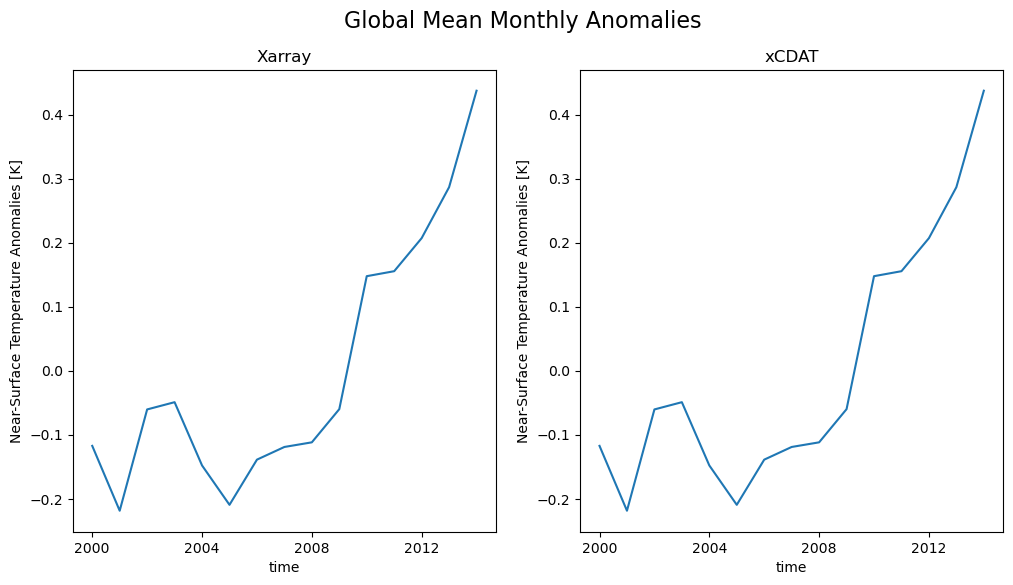

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 6)
fig.suptitle("Global Mean Monthly Anomalies", fontsize=16)

# Add the subplots
tas_anom_global_ann.plot(ax=ax1)
ds_anom_glb_ann.tas.plot(ax=ax2)

# Configure subplots
ax1.set_ylabel("Near-Surface Temperature Anomalies [K]")
ax2.set_ylabel("Near-Surface Temperature Anomalies [K]")
ax1.title.set_text("Xarray")
ax2.title.set_text("xCDAT")

### Getting Started with xCDAT

- xCDAT is available for installation through Anaconda on the `conda-forge` channel
  - Install command: `conda install -c conda-forge xcdat`
- Check out xCDAT’s Read the Docs, which we strive to keep up-to-date
  - https://xcdat.readthedocs.io/en/stable/

<div style="text-align: center;">
    <img src="../../demos/1-25-23-cwss-seminar/images/anaconda-logo.png" alt="Anaconda logo" align=\"center\" style="display: inline-block; margin-right:50px; width:300px;">
    <img src="../../demos/1-25-23-cwss-seminar/images/conda-forge-logo.png" alt="Conda Forge logo" style="display: inline-block; margin-right:50px; width:300px;">
</div>

<div style="text-align: center; margin-top:10px">
  <img src="../../demos/1-25-23-cwss-seminar/images/rtd-logo.png" alt="Read the docs logo" style="display: inline-block; width:300px; margin-right:50px">
  <img src="../../demos/1-25-23-cwss-seminar/images/rtd-screenshot.png" alt="xCDAT docs" style="display: inline-block; width:300px">
</div>


### How to use xCDAT

- xCDAT extends Xarray Dataset objects via "accessor" classes.

<div style="text-align: center;">
    <img src="../../_static/accessor_api.svg" alt="accessor api" align=\"center\" style="display: inline-block; margin-right:50px; width:900px;">
      <figcaption style="text_align:center; font-style: italic; font-size: 14px;">In the example above, custom spatial functionality is exposed by chaining the `spatial` accessor attribute to the Dataset object. This chaining enables access to the underlying `spatial.average()` method.</figcaption></img>
</div>

#### Accessors classes include:

- `spatial` -- `.average()`, `.get_weights()`
- `temporal` -- `.average()`, `.group_average()`, `.climatology()`, `.depatures()`
- `regridding` -- `horizontal()`, `vertical()`
- `bounds` -- `.get_bounds()`, `.add_bounds()`, `.add_missing_bounds()`


#### xCDAT also provides general utilities as Python functions

- `open_dataset()`, `open_mfdataset()`
- `center_times()`, `decode_time()`
- `swap_lon_axis()`
- `create_axis()`
- `create_grid()`
- `get_dim_coords()`
- `get_dim_keys()`

Visit the API Reference page for a complete list: https://xcdat.readthedocs.io/en/latest/api.html


## End-to-End Analysis and Visualization of CMIP Data using xCDAT

### Overview

Use `xcdat` to perform computation and analysis on CMIP6 data from the E3SM v2 model.

### Sections

1. Setup Code
2. I/O
3. Horizontal Regridding
4. Vertical Regridding
5. Spatial Averaging
6. Temporal Computations


### 1. Setup Code


In [5]:
# This style import is necessary to properly render Xarray's HTML output with
# the Jupyer RISE extension.
# GitHub Issue: https://github.com/damianavila/RISE/issues/594
# Source: https://github.com/smartass101/xarray-pydata-prague-2020/blob/main/rise.css

from IPython.core.display import HTML

style = """
<style>
.reveal pre.xr-text-repr-fallback {
    display: none;
}
.reveal ul.xr-sections {
    display: grid
}

.reveal ul ul.xr-var-list {
    display: contents
}
</style>
"""


HTML(style)

In [6]:
import numpy as np
from xarray.coding.calendar_ops import _datetime_to_decimal_year as dt2decimal
import xcdat as xc
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

### 2. I/O


- Use `xc.open_dataset()` to a single netCDF dataset as an `xr.Dataset` object.
- API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xcdat.open_dataset.html


Analyzing monthly `tas` (near-sea surface air temperature) data from 2000 to 2014.


In [7]:
ds = xc.open_dataset(dpath, chunks={"time": "auto"})

ds.tas

<xarray.DataArray 'tas' (time: 180, lat: 180, lon: 360)> Size: 47MB
dask.array<open_dataset-tas, shape=(180, 180, 360), dtype=float32, chunksize=(180, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    height   float64 8B ...
  * time     (time) object 1kB 2000-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2022-08-31T00:41:19Z altered by CMOR: Treated scalar dime...

### 3. Horizonal Regridding

We often want to regrid a dataset to a new grid to facilitate data analysis or comparisons with other datasets.

The current dataset is on a standard 1 x 1<sup>o</sup>, so we'll start be remapping it to a 4 x 4<sup>o</sup> grid.


#### First, we specify the target grid


In [8]:
# create target axes
nlat = xc.create_axis(
    "lat", np.arange(-88, 90, 4), attrs={"units": "degrees_north", "axis": "Y"}
)
nlon = xc.create_axis(
    "lon", np.arange(2, 360, 4), attrs={"units": "degrees_east", "axis": "X"}
)

#### Then we create the target grid using the target axes and bounds.


- API Documentation: https://xcdat.readthedocs.io/en/latest/generated/xcdat.create_grid.html#xcdat.create_grid


In [9]:
ngrid = xc.create_grid(x=nlon, y=nlat)

In [10]:
ngrid

<xarray.Dataset> Size: 3kB
Dimensions:   (lon: 90, bnds: 2, lat: 45)
Coordinates:
  * lon       (lon) int64 720B 2 6 10 14 18 22 26 ... 338 342 346 350 354 358
  * lat       (lat) int64 360B -88 -84 -80 -76 -72 -68 -64 ... 68 72 76 80 84 88
Dimensions without coordinates: bnds
Data variables:
    lon_bnds  (lon, bnds) float64 1kB 0.0 4.0 4.0 8.0 ... 356.0 356.0 360.0
    lat_bnds  (lat, bnds) float64 720B -90.0 -86.0 -86.0 ... 86.0 86.0 90.0

#### Call the xESMF regridder

- Here we're using bilinear regridding.
- Other methods may be appropriate (e.g., you may want to use "conservative_normed" for fields that should be conserved globally).


- API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.regridder.horizontal.html


In [11]:
ds_xesmf = ds.regridder.horizontal("tas", ngrid, tool="xesmf", method="bilinear")

ds_xesmf_res = ds_xesmf.compute()
ds_xesmf_res.tas

<xarray.DataArray 'tas' (time: 180, lat: 45, lon: 90)> Size: 3MB
array([[[254.80368, 254.78343, 254.74211, ..., 254.88435, 254.90971,
         254.92215],
        [257.2558 , 257.22675, 257.16754, ..., 257.7982 , 257.8332 ,
         257.85037],
        [258.29645, 258.3135 , 256.78406, ..., 263.4677 , 260.28214,
         260.2593 ],
        ...,
        [250.3139 , 250.1259 , 249.97371, ..., 245.62357, 248.0541 ,
         248.21025],
        [244.18497, 244.17938, 244.168  , ..., 242.8041 , 242.80026,
         242.79839],
        [246.51666, 246.51863, 246.52267, ..., 245.52602, 245.52087,
         245.51834]],

       [[239.50679, 239.49693, 239.47685, ..., 241.59889, 241.61044,
         241.6161 ],
        [243.79228, 243.74625, 243.65237, ..., 245.85437, 245.93097,
         245.96852],
        [247.7796 , 247.78099, 244.87497, ..., 253.66777, 250.53073,
         250.54012],
...
        [261.87976, 261.79492, 261.16986, ..., 260.08438, 261.37366,
         261.41708],
        [260.14633, 260.1443 , 260.14014, ..., 259.97244, 259.97925,
         259.9826 ],
        [259.46265, 259.46155, 259.45938, ..., 259.9725 , 259.9745 ,
         259.97546]],

       [[252.21017, 252.19913, 252.1766 , ..., 255.2488 , 255.27554,
         255.28867],
        [255.71132, 255.6868 , 255.63676, ..., 257.84174, 257.9083 ,
         257.94095],
        [257.31497, 257.33   , 254.7836 , ..., 263.55304, 259.87366,
         259.87204],
        ...,
        [253.8272 , 253.71956, 254.17628, ..., 249.8605 , 251.81378,
         251.85973],
        [251.8344 , 251.8372 , 251.84293, ..., 250.79904, 250.78775,
         250.78221],
        [252.34998, 252.34982, 252.3495 , ..., 252.28952, 252.28876,
         252.28838]]], dtype=float32)
Coordinates:
    height   float64 8B 2.0
  * time     (time) object 1kB 2000-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon      (lon) int64 720B 2 6 10 14 18 22 26 ... 334 338 342 346 350 354 358
  * lat      (lat) int64 360B -88 -84 -80 -76 -72 -68 -64 ... 68 72 76 80 84 88
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    comment:        near-surface (usually, 2 meter) air temperature
    units:          K
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2022-08-31T00:41:19Z altered by CMOR: Treated scalar dime...
    regrid_method:  bilinear

#### Compare the results (for the first timestep)


Text(0.5, 1.0, 'xESMF 4$^{\\circ}$ x 4$^{\\circ}$')

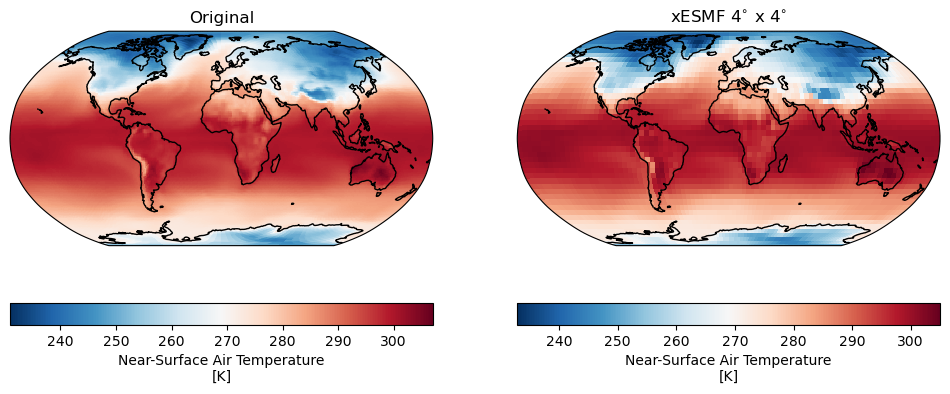

In [12]:
map_proj = ccrs.Robinson()

# plot original data (first time step)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1, projection=map_proj)
p = ds.tas[0].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    cbar_kwargs={"orientation": "horizontal"},
    cmap=plt.cm.RdBu_r,
)
ax = plt.gca()
ax.coastlines()
plt.title("Original")

# plot the remapped data (first time step)
plt.subplot(1, 2, 2, projection=map_proj)
p = ds_xesmf.tas[0].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    subplot_kws={"projection": map_proj},
    cbar_kwargs={"orientation": "horizontal"},
    cmap=plt.cm.RdBu_r,
)
ax = plt.gca()
ax.coastlines()
plt.title("xESMF 4$^{\circ}$ x 4$^{\circ}$")

### 4. Vertical Regridding

xCDAT can also regrid in the vertical dimension.

Here we'll grab some cloud fraction data (`cl`) and regrid it from model hybrid coordinate to pressure levels.


Documentation: https://xcdat.readthedocs.io/en/stable/examples/regridding-vertical.html#4:-Remap-cloud-fraction-from-model-hybrid-coordinate-to-pressure-levels


In [13]:
data_url = "http://esgf-data04.diasjp.net/thredds/dodsC/esg_dataroot/CMIP6/CMIP/E3SM-Project/E3SM-2-0/historical/r1i1p1f1/Amon/cl/gr/v20220830/cl_Amon_E3SM-2-0_historical_r1i1p1f1_gr_200001-201412.nc"

In [14]:
ds_3d = xc.open_dataset(data_url, chunks={"time": "auto"})

ds_3d.cl

<xarray.DataArray 'cl' (time: 180, lev: 72, lat: 180, lon: 360)> Size: 3GB
dask.array<open_dataset-cl, shape=(180, 72, 180, 360), dtype=float32, chunksize=(7, 72, 180, 360), chunktype=numpy.ndarray>
Coordinates:
  * lev      (lev) float64 576B 0.9985 0.9938 0.9862 ... 0.0001828 0.0001238
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time     (time) object 1kB 2000-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    standard_name:  cloud_area_fraction_in_atmosphere_layer
    long_name:      Percentage Cloud Cover
    comment:        Percentage cloud cover, including both large-scale and co...
    units:          %
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2022-08-30T15:06:03Z altered by CMOR: Inverted axis: lev.
    _ChunkSizes:    [  1  36  90 180]

Regrid the `cl` variable using `regridder.vertical()` with:

- `new_pressure_grid` as the output grid
- `"linear"` method
- `pressure_data` as the target data.


In [15]:
def hybrid_coordinate(p0, a, b, ps, **kwargs):
    return a * p0 + b * ps


pressure_data = hybrid_coordinate(**ds_3d.data_vars)
new_pressure_grid = xc.create_grid(z=xc.create_axis("lev", np.linspace(100000, 1, 13)))

ds_vr = ds_3d.regridder.vertical(
    "cl", new_pressure_grid, method="linear", target_data=pressure_data
)
ds_vr_res = ds_vr.compute()

/opt/miniconda3/envs/xcdat_scipy_2024/lib/python3.11/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(


#### Finally, we plot the result:


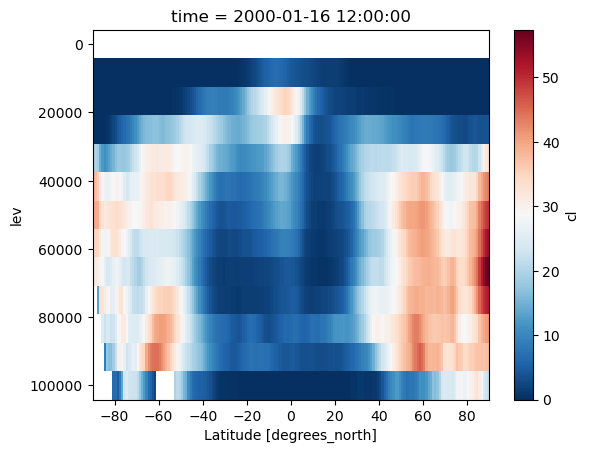

In [16]:
ds_vr_zonal = ds_vr.isel(time=0).spatial.average("cl", axis=["X"]).squeeze()

ds_vr_zonal.cl.plot(cmap=plt.cm.RdBu_r)
plt.gca().invert_yaxis()

### 5. Spatial Averaging

- Area-weighted spatial averaging is a common technique to reduce dimensionality in geospatial datasets.
- xCDAT can perform this calculation over full domains or regions of interest.


#### Calculate the spatial average of `tas` and store the results in a Python variable.


- API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.spatial.average.html


In [17]:
ds_global = ds.spatial.average("tas")

ds_global

<xarray.Dataset> Size: 19kB
Dimensions:    (time: 180, bnds: 2, lat: 180, lon: 360)
Coordinates:
  * lat        (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon        (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    height     float64 8B ...
  * time       (time) object 1kB 2000-01-16 12:00:00 ... 2014-12-16 12:00:00
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 3kB dask.array<chunksize=(180, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 6kB dask.array<chunksize=(360, 2), meta=np.ndarray>
    tas        (time) float64 1kB dask.array<chunksize=(180,), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  36500.0
    creation_date:          2022-08-31T00:41:19Z
    ...                     ...
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by E3SM-Project is lice...
    cmor_version:           3.6.1
    tracking_id:            hdl:21.14100/5e95fb4d-19ba-4037-8000-818fe3955601
    version:                v20220830
    references:             Golaz, J.-C., L. P. Van Roekel, X. Zheng and co-a...

#### Now let's plot the results (first 120 timesteps)

Note that the spatial averager returns a dataset object so we still need to specify `tas` to plot the dataarray.


Text(0, 0.5, 'Near Surface Air Temperature [K]')

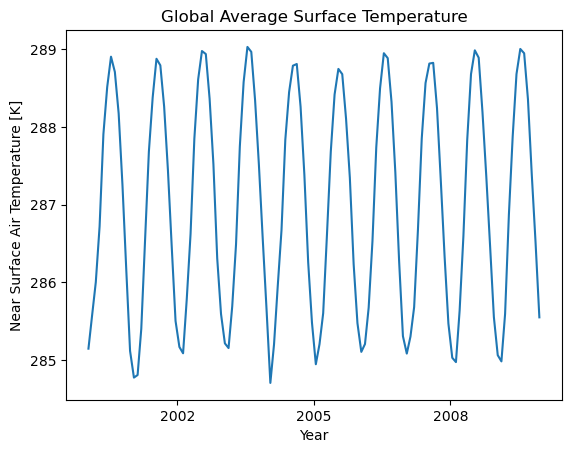

In [18]:
ds_global.tas.isel(time=slice(0, 120)).plot()
plt.title("Global Average Surface Temperature")
plt.xlabel("Year")
plt.ylabel("Near Surface Air Temperature [K]")

#### Calculate the near-surface air temperature (`tas`) in the Niño 3.4 region.


Users can also specify their own bounds for a region. In this case, we specified `keep_weights=True`.

- Full weight for grid cells entirely in the region
- Partial weights for grid cells partially in the region


In [19]:
ds_nino34 = ds_xesmf.spatial.average(
    "tas", lat_bounds=(-5, 5), lon_bounds=(190, 240), keep_weights=True
).compute()

#### Plot the Niño 3.4 region time series


Text(0.5, 1.0, 'Nino 3.4 Weights')

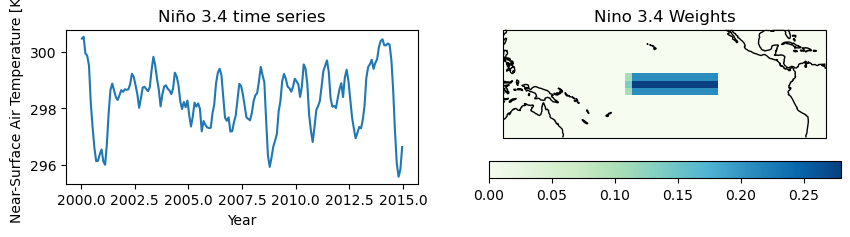

In [20]:
dtime = dt2decimal(ds_nino34.time)  # decimal time

plt.figure(figsize=(10, 2))
plt.subplot(1, 2, 1)
plt.plot(dtime, ds_nino34["tas"].values)
plt.xlabel("Year")
plt.ylabel("Near-Surface Air Temperature [K]")
plt.title("Niño 3.4 time series")

# show the weights
map_proj = ccrs.PlateCarree(central_longitude=180)
ax = plt.subplot(1, 2, 2, projection=map_proj)
plt.pcolor(
    ds_nino34.lon,
    ds_nino34.lat,
    ds_nino34.lat_lon_wts.T,
    transform=ccrs.PlateCarree(),
    cmap=plt.cm.GnBu,
)
ax.set_extent([120, 300, -30, 30], crs=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(orientation="horizontal")
plt.title("Nino 3.4 Weights")

### 6. Temporal Computations with xCDAT

In the examples below, we will performing temporal computations on the `xarray.Dataset` object using xCDAT.


#### 6.1 Seasonal cycle mean

In the global mean time series above, there are large seasonal swings in global near-surface air temperature. Here we compute the seasonal mean climatology.


#### Calculate the seasonal mean climatology for the `tas` variable.


API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.temporal.climatology.html


In [21]:
ds_clim = ds.temporal.climatology("tas", freq="season")

#### Now we plot the season means


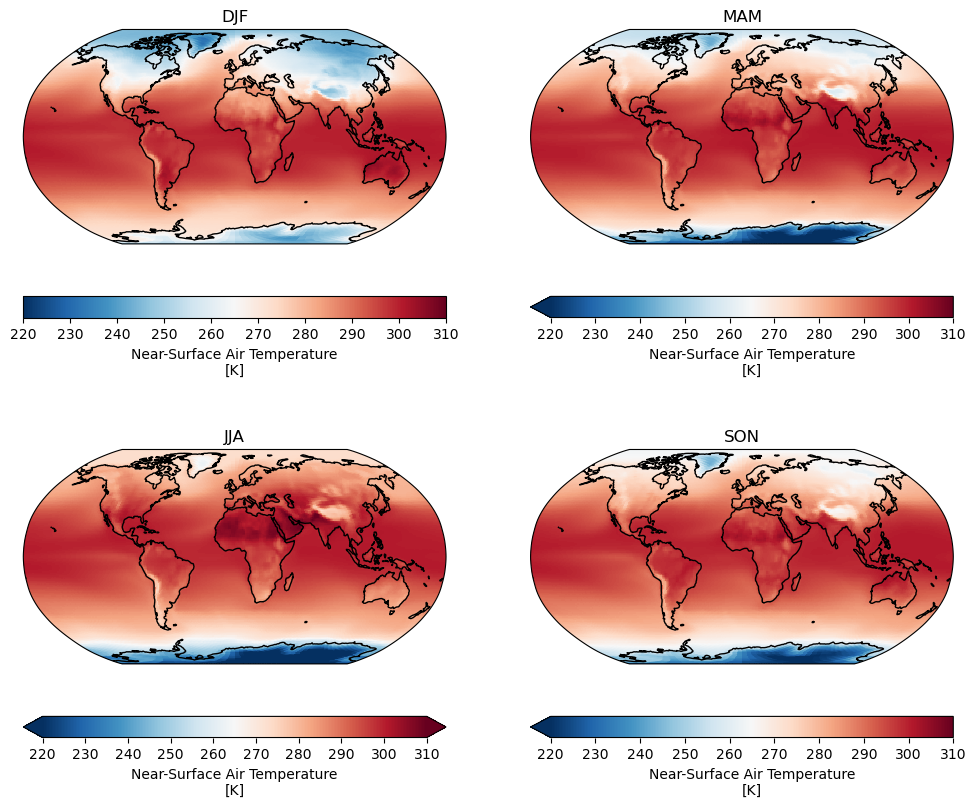

In [22]:
map_proj = ccrs.Robinson()
titles = ["DJF", "MAM", "JJA", "SON"]
plt.figure(figsize=(12, 10))
for i in range(4):
    plt.subplot(2, 2, i + 1, projection=map_proj)
    p = ds_clim.tas[i].plot(
        transform=ccrs.PlateCarree(),
        subplot_kws={"projection": map_proj},
        cbar_kwargs={"orientation": "horizontal"},
        cmap=plt.cm.RdBu_r,
        vmin=220,
        vmax=310,
    )
    ax = plt.gca()
    ax.coastlines()
    plt.title(titles[i])

#### 6.2 Departures

It can also be useful to show the departures ("anomalies") from the climatological average.

In climatology, **anomalies** refer to the **difference between the value during a given time interval** and the **long-term average value for that time interval**.

- _For example, the difference between a January average surface air temperature and the average surface temperature over the last 30 Januaries._


#### Calculate the monthly mean departures for the `tas` variable.

In this case, `xcdat` will operate on the global mean time series we calculated above.

Note that you can set the climatological reference period for historical era departures.
We use `reference_period=("2000-01-01", "2009-12-31")` below.


In [23]:
ds_global_anomaly = ds_global.temporal.departures(
    "tas", freq="month", reference_period=("2000-01-01", "2009-12-31")
)

/opt/miniconda3/envs/xcdat_scipy_2024/lib/python3.11/site-packages/xarray/core/indexing.py:1617: PerformanceWarning: Slicing with an out-of-order index is generating 15 times more chunks
  return self.array[key]


API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.temporal.departures.html


#### Now let's plot the departures from the climatological average.


Text(0, 0.5, 'Global Mean Near-Surface Air Temperature Anomaly [K]')

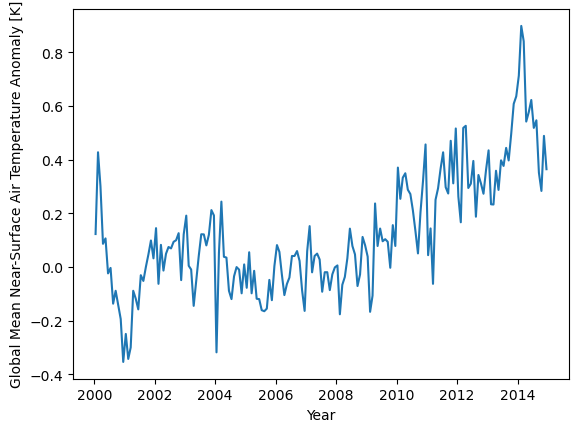

In [24]:
plt.plot(dtime, ds_global_anomaly.tas.values)
plt.xlabel("Year")
plt.ylabel("Global Mean Near-Surface Air Temperature Anomaly [K]")

#### 6.3 Group averages

`xcdat` also allows you to calculate group averages.

- _For example, annual or seasonal mean from monthly data or monthly mean from daily data_


#### Calculate the annual mean from anomaly time series.

- API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.temporal.group_averages.html


In [25]:
ds_global_anomaly_annual = ds_global_anomaly.temporal.group_average("tas", freq="year")

#### Now let's plot the results.


Text(0, 0.5, 'Global Mean Near-Surface Air Temperature [K]')

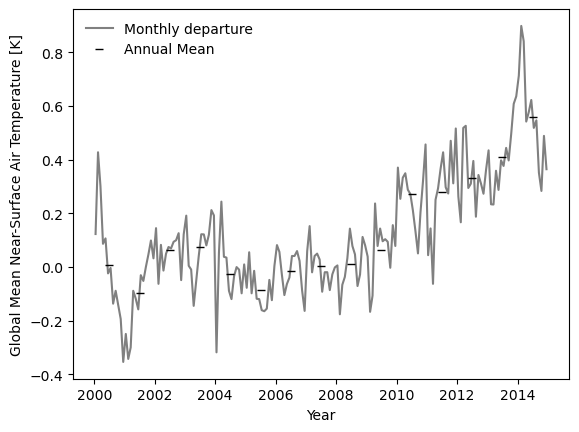

In [26]:
# plot data
dtime_annual = dt2decimal(ds_global_anomaly_annual.time) + 0.5
plt.plot(dtime, ds_global_anomaly.tas.values, label="Monthly departure", color="gray")
plt.plot(
    dtime_annual,
    ds_global_anomaly_annual.tas.values,
    color="k",
    linestyle="",
    marker="_",
    label="Annual Mean",
)
plt.legend(frameon=False)
plt.xlabel("Year")
plt.ylabel("Global Mean Near-Surface Air Temperature [K]")

### 7. General Dataset Utilities

xCDAT includes various utilities for data manipulation including:

- Reorient the longitude axis
- Add missing bounds
- Centering of time coordinates using time bounds\*
- Add and get bounds\*

<p style="font-size: 12px; font-style: italic">* not shown</p>


#### 7.1. Reorient the longitude axis

- Longitude can be represented from 0 to 360 E or as 180 W to 180 E.
- xcdat allows you to convert between these axes systems using `xc.swap_lon_axis`.


- API Documentation: https://xcdat.readthedocs.io/en/stable/generated/xcdat.swap_lon_axis.html


In [27]:
print(f"Original lon axis: ({ds.lon[0].item()}, {ds.lon[-1].item()})")

Original lon axis: (0.5, 359.5)


In [28]:
ds_swap = xc.swap_lon_axis(ds, to=(-180, 180))

print(f"Swapped lon axis: ({ds_swap.lon[0].item()}, {ds_swap.lon[-1].item()})")

Swapped lon axis: (-179.5, 179.5)


#### 7.2. Add missing bounds

**Bounds are critical to many `xcdat` operations.**

- For example, they are used in determining the weights in spatial or temporal averages and in regridding operations.
- `add_missing_bounds()` will attempt to produce bounds if they do not exist in the original dataset.


- API documentation: https://xcdat.readthedocs.io/en/stable/generated/xarray.Dataset.bounds.add_missing_bounds.html


In [30]:
# We are dropping the existing bounds to demonstrate adding bounds.
ds_no_bnds = ds.drop_vars("time_bnds")

try:
    ds_no_bnds.bounds.get_bounds("T")
except KeyError as e:
    print(e)

"No bounds data variables were found for the 'T' axis. Make sure the dataset has bound data vars and their names match the 'bounds' attributes found on their related time coordinate variables. Alternatively, you can add bounds with `ds.bounds.add_missing_bounds()` or `ds.bounds.add_bounds()`."


In [31]:
ds_w_bnds = ds_no_bnds.bounds.add_missing_bounds(axes=["T"])

ds_w_bnds.bounds.get_bounds("T")

<xarray.DataArray 'time_bnds' (time: 180, bnds: 2)> Size: 3kB
array([[cftime.DatetimeNoLeap(2000, 1, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 2, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2000, 2, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 3, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2000, 3, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 4, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2000, 4, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 5, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2000, 5, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 6, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2000, 6, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 7, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2000, 7, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 8, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2000, 8, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 9, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2000, 9, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 10, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2000, 10, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2000, 11, 1, 0, 0, 0, 0, has_year_zero=True)],
...
        cftime.DatetimeNoLeap(2014, 4, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 4, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 5, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 5, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 6, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 6, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 7, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 7, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 8, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 8, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 9, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 9, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 10, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 10, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 11, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 11, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True)],
       [cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
        cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)]],
      dtype=object)
Coordinates:
    height   float64 8B ...
  * time     (time) object 1kB 2000-01-16 12:00:00 ... 2014-12-16 12:00:00
Dimensions without coordinates: bnds
Attributes:
    xcdat_bounds:  True

## Parallelism with Dask

<div style="text-align:center">
  <img src="../../_static/dask-logo.svg" alt="Dask logo" style="display: inline-block; width:300px;">
</div>

> "Nearly all existing xarray methods have been extended to work automatically with Dask arrays for parallelism"

- Parallelized xarray methods include **indexing, computation, concatenating and grouped operations**
- **xCDAT inherits Xarray's support for Dask parallelism** by operating on Xarray objects.
- Dask arrays are loaded into memory only when absolutely required (e.g., generating weights for averaging)

&mdash; <cite>https://docs.xarray.dev/en/stable/user-guide/dask.html#using-dask-with-xarray</cite>


### Example of Parallelizing xCDAT with Dask

1. Open ~11 GB dataset using `xc.open_mfdataset()`
2. Chunked on time dimension by 10 (parallel) and by 1 (serial)
3. Compare run times of global spatial averaging


_This exercise requires data to be downloaded locally using this command:
`bash docs/demos/24-07-11-scipy-2024/tas_day_E3SM-2-0_historical_r1i1p1f1_gr/tas_day_wget_script_2024-6-25_11-31-0.sh -s`_


In [32]:
import os

import xcdat as xc

FILENAMES = [
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_18500101-18591231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_18600101-18691231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_18700101-18791231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_18800101-18891231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_19000101-19091231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_19100101-19191231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_19300101-19391231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_19400101-19491231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_19600101-19691231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_19700101-19791231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_19800101-19891231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_19900101-19991231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_20000101-20091231.nc",
    "tas_day_E3SM-2-0_historical_r1i1p1f1_gr_20100101-20141231.nc",
]

LOCAL_DIR = "docs/demos/24-07-11-scipy-2024/tas_day_E3SM-2-0_historical_r1i1p1f1_gr"
LOCAL_FILEPATHS = [os.path.join(LOCAL_DIR, file) for file in FILENAMES]

ds_parallel = xc.open_mfdataset(LOCAL_FILEPATHS, chunks={"time": 10})
ds_serial = xc.open_mfdataset(LOCAL_FILEPATHS, chunks={"time": 1})

#### Now let's compare the performance of xCDAT `spatial.average()`


In [33]:
%%time
ds_parallel_avg = ds_parallel.spatial.average("tas")
ds_parallel_avg = ds_parallel.compute()

CPU times: user 1min 6s, sys: 9.39 s, total: 1min 16s
Wall time: 1min 59s


In [34]:
%%time
ds_serial_avg = ds_serial.spatial.average("tas")
ds_serial_avg = ds_serial.compute()

CPU times: user 1min 31s, sys: 14.1 s, total: 1min 45s
Wall time: 2min 37s


#### xCDAT's spatial averager is faster when chunking on the time dimension by 10 and executing in parallel.


### xCDAT also outperforms the older CDAT library by much large margins in some cases.

For example, for global spatial averaging across various file sizes:

<div style="text-align: left; margin-top:10px">
    <img src="./images/joss-perf-metrics.png" alt="JOSS Perf Metrics" align=\"center\" style="display: inline-block; width:800px;border: 1px solid #555;">
    <p style="font-size: 20px; font-style: italic">* CDAT only runs functions serially and crashes with 22 GB+ datasets.</p>
</div>

Source: https://joss.theoj.org/papers/10.21105/joss.06426


### Further Dask Guidance

Visit these pages for more guidance (e.g., when to parallelize):

- Parallel computing with Dask (xCDAT): https://xcdat.readthedocs.io/en/latest/examples/parallel-computing-with-dask.html
- Parallel computing with Dask (Xarray): https://docs.xarray.dev/en/stable/user-guide/dask.html
- Xarray with Dask Arrays: https://examples.dask.org/xarray.html


### What are some things in the works with xCDAT?

- **Collaborate with UXarray** for interoperation of two tools to support end-to-end and more streamlined operation on unstructured (i.e. E3SM native output) datasets.
- **Continue assisting DOE funded projects** including PCMDI Metrics Package, E3SM Diags
- **Explore other DOE funded projects** to integrate xCDAT for analysis capabilities (e.g., ARM Diags and ILAMB)
- **Explore xarray-datatree** package for analyzing ensembles with xCDAT capabilities


<div style="text-align: left; margin-top:10px">
    <h3><img src="../../_static/github-logo.png" alt="GitHub logo" align=\"center\" style="display: inline-block; width:200px;">
    <img src="../../_static/github-logo-icon.png" alt="GitHub logo" align=\"center\" style="display: inline-block; width:75px;">
    Get involved and join the xCDAT community!</h3>
</div>

<div style="text-align: center; margin-top:10px">
    <img src="images/doc-qr-code.png" alt="QR Code" align=\"center\" style="display: inline-block; width:100px;">
</div>

- **Code contributions** are welcome and appreciated
  - GitHub Repository: https://github.com/xCDAT/xcdat
  - Contributing Guide: https://xcdat.readthedocs.io/en/latest/contributing.html
- **Submit and/or address tickets** for feature suggestions, bugs, and documentation updates
  - GitHub Issues: https://github.com/xCDAT/xcdat/issues
- **Participate in forum discussions** on version releases, architecture, feature suggestions, etc.

- GitHub Discussions: https://github.com/xCDAT/xcdat/discussions


<div style="text-align: left; margin-top:10px">
    <img src="../../_static/xcdat-logo.png" alt="xCDAT logo" align=\"center\" style="display: inline-block; width:300px;">
    <h3>Key takeaways</h3>
</div>

- xCDAT is an **extension of Xarray for climate data analysis on structured grids**
- Focused on routine **climate research analysis operations**
- Designed to encourages **software sustainability and reproducible science**
- **Parallelizable** through Xarray’s support for Dask, which enables efficient processing of large datasets
